## Bussiness Analytics
#### Exploratory Data Analysis on the dataset ‘SampleSuperstore’ 


In [66]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('SampleSuperstore.csv', encoding = 'ISO-8859-1')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


The dataset contain information about the shipment, sales, quantity and profit of different sub-categories of office supplies, furniture and other technical equipments in different cities of United States. 

In [68]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Profit          0
Discount        0
Quantity        0
Sales           0
Sub-Category    0
Category        0
Region          0
Postal Code     0
State           0
City            0
Country         0
Segment         0
Ship Mode       0
dtype: int64

No need to clean data

In [4]:
df.describe().round()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.0,9994.0,9994.0,9994.0,9994.0
mean,55190.0,230.0,4.0,0.0,29.0
std,32064.0,623.0,2.0,0.0,234.0
min,1040.0,0.0,1.0,0.0,-6600.0
25%,23223.0,17.0,2.0,0.0,2.0
50%,56430.0,54.0,3.0,0.0,9.0
75%,90008.0,210.0,5.0,0.0,29.0
max,99301.0,22638.0,14.0,1.0,8400.0


In [7]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

This shows that on average, superstore make sale of approximately $200 with high deviation.

In [11]:
df.groupby(by=['Category'], as_index=False)['Quantity'].sum()

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


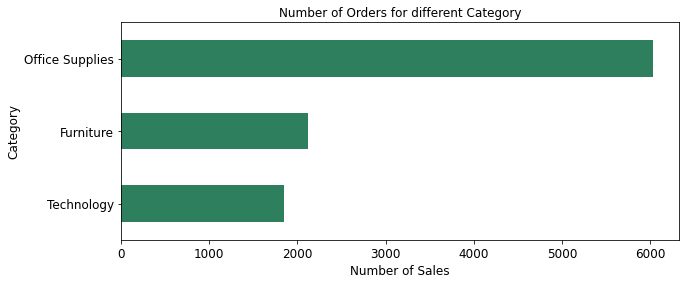

In [20]:
group_country_orders = df.groupby('Category')['Quantity'].count().sort_values()
plt.subplots(figsize=(10,4))
group_country_orders.plot(kind='barh', fontsize=12, color='#2d7f5e')
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Number of Orders for different Category', fontsize=12)
plt.show()

In [15]:
d3=df.groupby(by=['Sub-Category'], as_index=False)['Quantity'].sum()
d3.sort_values(by='Quantity', ascending=False).head()

,Sub-Category,Quantity
3,Binders,5974
12,Paper,5178
9,Furnishings,3563
13,Phones,3289
14,Storage,3158


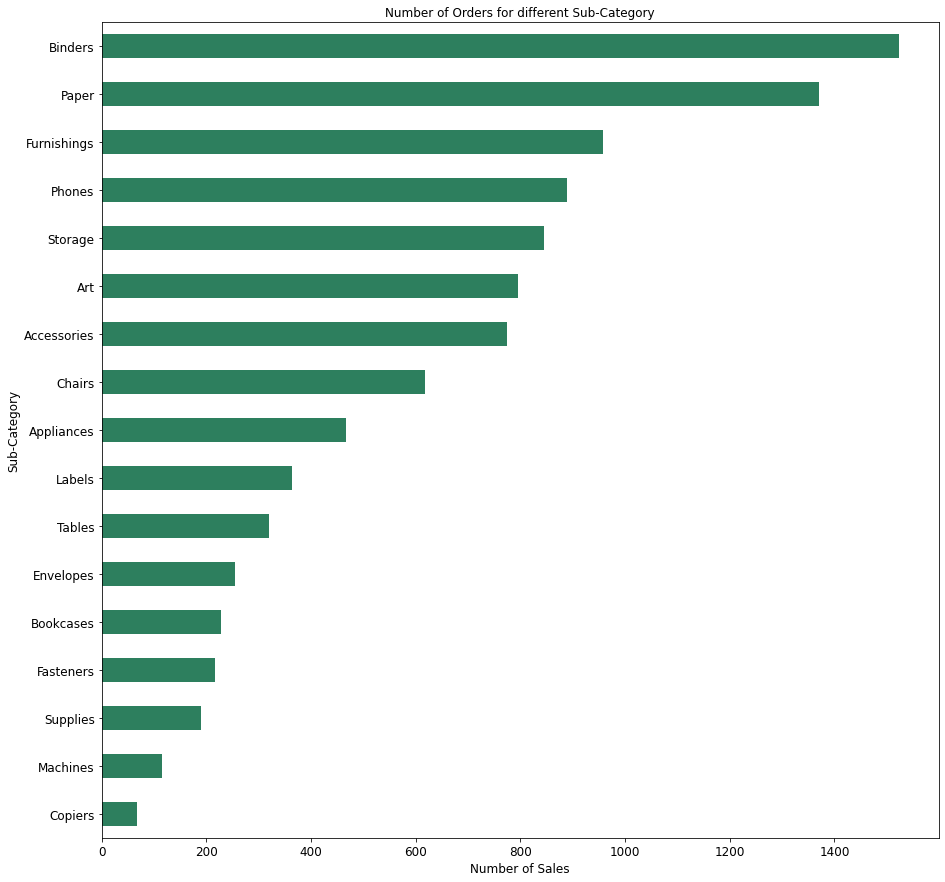

In [22]:
group_country_orders = df.groupby('Sub-Category')['Quantity'].count().sort_values()
plt.subplots(figsize=(15,15))
group_country_orders.plot(kind='barh', fontsize=12, color='#2d7f5e')
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.title('Number of Orders for different Sub-Category', fontsize=12)
plt.show()

In [23]:
df.groupby(by=['Segment'], as_index=False)['Quantity'].sum().head()

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


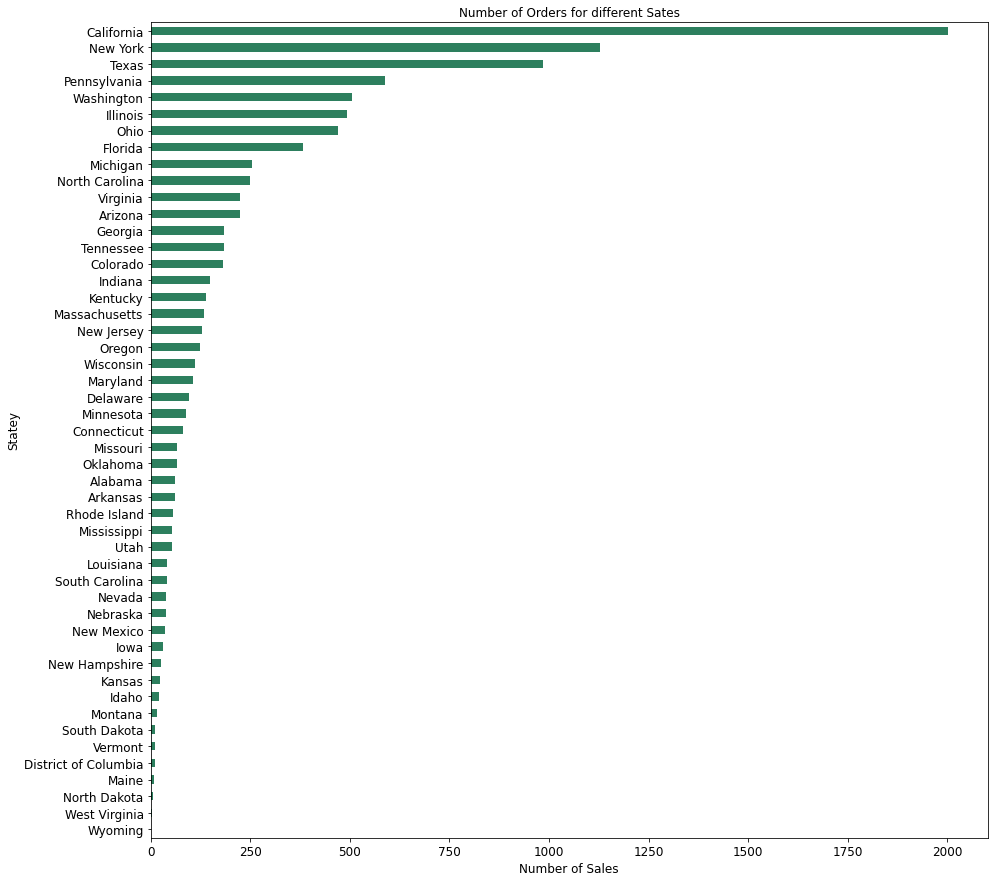

In [25]:
group_country_orders = df.groupby('State')['Quantity'].count().sort_values()
plt.subplots(figsize=(15,15))
group_country_orders.plot(kind='barh', fontsize=12, color='#2d7f5e')
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Statey', fontsize=12)
plt.title('Number of Orders for different Sates', fontsize=12)
plt.show()

In [26]:
city = df.groupby(by=['State','City'], as_index=False)['Quantity'].sum()
print('Cities with maximum quantity of items...')
city.sort_values(by='State', ascending=True).head()

Cities with maximum quantity of items...


,State,City,Quantity
0,Alabama,Auburn,16
1,Alabama,Decatur,52
2,Alabama,Florence,24
3,Alabama,Hoover,15
4,Alabama,Huntsville,40


Filter data for items with discounts

In [27]:
df_discount=df[df['Discount']!=0]
df_discount.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092


In [28]:
df_discount_new=df_discount[['Profit','Quantity']]
df_discount_new[df_discount_new['Profit']>0].sum()

Profit      121540.7042
Quantity     12436.0000
dtype: float64

This shows that for discounted items, the superstore made profit of $121540 on 12436 items 

In [29]:
df_discount_new[df_discount_new['Profit']<0].sum()

Profit     -156131.2857
Quantity      7040.0000
dtype: float64

In [31]:
df_loss = df[df.Profit <= 0]
df_profit = df[df.Profit > 0]

This shows that for discounted items, the superstore had loss of $156131 on 7040 items


In [58]:
d=round(abs((df_loss['Profit'].sum())/(df_loss['Sales'].sum()))*100,2)
print('Loss on items rooting losses: {} %'.format(d))

Loss on items rooting losses: 31.45 %


In [63]:
print('Items likey to face loss:')
df[df['Profit']<0]['Sub-Category'].unique()


Items facing loss on discounts


array(['Tables', 'Appliances', 'Binders', 'Chairs', 'Bookcases',
       'Furnishings', 'Storage', 'Accessories', 'Phones', 'Machines',
       'Supplies', 'Fasteners'], dtype=object)

In [59]:
d=round(abs((df_profit['Profit'].sum())/(df_profit['Sales'].sum()))*100,2)
print('Profit on items rooting profits: {} %'.format(d))

Profit on items rooting profits: 24.57 %


In [65]:
print('Items likey to raise profit:')
df[df['Profit']>0]['Sub-Category'].unique()


Items likey to raise profit:


array(['Bookcases', 'Chairs', 'Labels', 'Storage', 'Furnishings', 'Art',
       'Phones', 'Binders', 'Appliances', 'Tables', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [60]:
d=round(abs((df_loss['Profit'].sum())/(df['Sales'].sum()))*100,2)
print('Overall Loss: {} %'.format(d))

Overall Loss: 6.8 %


In [61]:
d=round(abs((df_profit['Profit'].sum())/(df['Sales'].sum()))*100,2)
print('Overall Profit: {} %'.format(d))

Overall Profit: 19.26 %


#### Overall profit of the superstore is promosing 